# Integration

**Import**

In [1]:
# from second tutorial notebook (Part02)
import scanpy as sc
import pandas as pd
import scvelo as scv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import ipywidgets as widgets

# others
import re
import os

# first tutorial
import bbknn
import diffxpy.api as dxpy
import plotly.express as px

# Meritxell's
import anndata2ri

In [2]:
# Meritxell's normalization
# Activate the anndata2ri conversion between SingleCellExperiment and AnnData
anndata2ri.activate()

#Loading the rpy2 extension enables cell magic to be used
#This runs R code in jupyter notebook cells
%load_ext rpy2.ipython

sc.settings.verbosity = 3
#sc.logging.print_versions()

In [3]:
bon_path = '/home/astridkd/testis_singlecell/Workspaces/adahl/birc-project-akd/results/cluster_results/BON/cluster_adata.h5ad'
chimp_path = '/home/astridkd/testis_singlecell/Workspaces/adahl/birc-project-akd/results/cluster_results/CHIMP/cluster_adata.h5ad' 
gor_path = '/home/astridkd/testis_singlecell/Workspaces/adahl/birc-project-akd/results/cluster_results/GOR/cluster_adata.h5ad'
mac_path = '/home/astridkd/testis_singlecell/Workspaces/adahl/birc-project-akd/results/cluster_results/MAC/cluster_adata.h5ad'
hum_path = '/home/astridkd/testis_singlecell/Workspaces/adahl/birc-project-akd/results/cluster_results/HUM/cluster_adata.h5ad'

In [4]:
bon = sc.read(bon_path)
chimp = sc.read(chimp_path)
gor = sc.read(gor_path)
mac = sc.read(mac_path)
hum = sc.read(hum_path)

In [5]:
bon.obs['spermatogenesis_types']

SN219_AAACCTGAGAAAGTGG             SC.I
SN219_AAACCTGAGGCGCTCT          Dif. SG
SN219_AAACCTGAGTCGCCGT        Undif. SG
SN219_AAACCTGCAGCGTTCG    Late round SD
SN219_AAACCTGGTAAGAGAG             SC.I
                              ...      
SN224_TTTGTCAAGGGATCTG        Undif. SG
SN224_TTTGTCAAGTGAACGC            SC.II
SN224_TTTGTCACAGTAGAGC        Elong. SD
SN224_TTTGTCACATCCTTGC            SC.II
SN224_TTTGTCATCCGCAGTG        Undif. SG
Name: spermatogenesis_types, Length: 5043, dtype: category
Categories (8, object): ['Dif. SG', 'Early round SD', 'Elong. SD', 'Late round SD', 'SC.I', 'SC.II', 'Sertoli', 'Undif. SG']

In [6]:
merged = bon.concatenate(chimp)

In [7]:
merged = merged.concatenate(gor)

In [8]:
merged = merged.concatenate(mac)

In [9]:
merged = merged.concatenate(hum)

In [10]:
merged

AnnData object with n_obs × n_vars = 46782 × 20350
    obs: 'DATASET', 'batch', 'total_counts', 'n_genes_by_counts', 'percent_mito', 'prop_unspl', 'prop_spl', 'perc_MALAT1', 'n_genes', 'doublet_scores', 'predicted_doublets', 'SpermatogoniaA_score', 'SpermatogoniaB_score', 'SpermatocytesI_score', 'SpermatocytesII_score', 'Round.Spt_score', 'Elong.Spt_score', 'Sertoli_score', 'Macroph_score', 'Leydig_score', 'Endothelial_score', 'Undif. SG_score', 'Dif. SG_score', 'Lept. SC_score', 'Zyg. SC_score', 'Pach.Dipl. SC_score', 'Early round SD_score', 'Late round SD_score', 'Elong SD_score', 'SC_score', 'SC.I_score', 'SC.II_score', 'leiden_R.3', 'leiden_R.2', 'leiden_R.1', 'spermatogenesis_types', 'leiden_R.4', 'leiden_R.5'
    var: 'feature_types', 'chromosome', 'gene_ids-0-0-0-0', 'n_cells-0-0-0-0', 'highly_variable-0-0-0-0', 'means-0-0-0-0', 'dispersions-0-0-0-0', 'dispersions_norm-0-0-0-0', 'gene_ids-1-0-0-0', 'n_cells-1-0-0-0', 'highly_variable-1-0-0-0', 'means-1-0-0-0', 'dispersions-1-0-0

In [17]:
merged

AnnData object with n_obs × n_vars = 46782 × 20350
    obs: 'DATASET', 'batch', 'total_counts', 'n_genes_by_counts', 'percent_mito', 'prop_unspl', 'prop_spl', 'perc_MALAT1', 'n_genes', 'doublet_scores', 'predicted_doublets', 'SpermatogoniaA_score', 'SpermatogoniaB_score', 'SpermatocytesI_score', 'SpermatocytesII_score', 'Round.Spt_score', 'Elong.Spt_score', 'Sertoli_score', 'Macroph_score', 'Leydig_score', 'Endothelial_score', 'Undif. SG_score', 'Dif. SG_score', 'Lept. SC_score', 'Zyg. SC_score', 'Pach.Dipl. SC_score', 'Early round SD_score', 'Late round SD_score', 'Elong SD_score', 'SC_score', 'SC.I_score', 'SC.II_score', 'leiden_R.3', 'leiden_R.2', 'leiden_R.1', 'spermatogenesis_types', 'leiden_R.4', 'leiden_R.5', 'species'
    var: 'feature_types', 'chromosome', 'gene_ids-Bon', 'n_cells-Bon', 'highly_variable-Bon', 'means-Bon', 'dispersions-Bon', 'dispersions_norm-Bon', 'gene_ids-Chimp', 'n_cells-Chimp', 'highly_variable-Chimp', 'means-Chimp', 'dispersions-Chimp', 'dispersions_norm-

In [9]:
# PCA, neighbors, UMAP on concatenated matrix of all species

In [10]:
sc.tl.pca(merged)

computing PCA
    with n_comps=50
    finished (0:01:26)


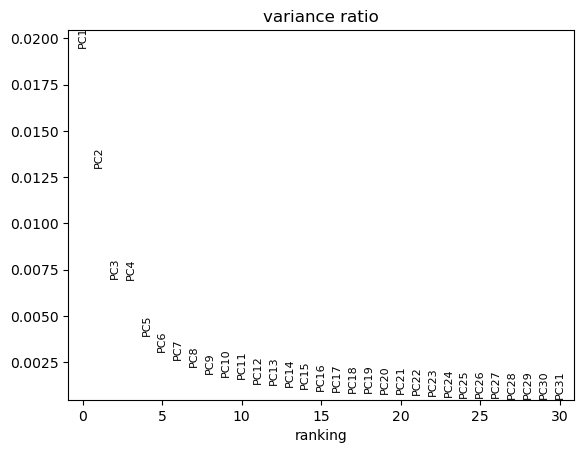

In [11]:
sc.plotting.pca_variance_ratio(merged) # small variance means it probably models noice in the data

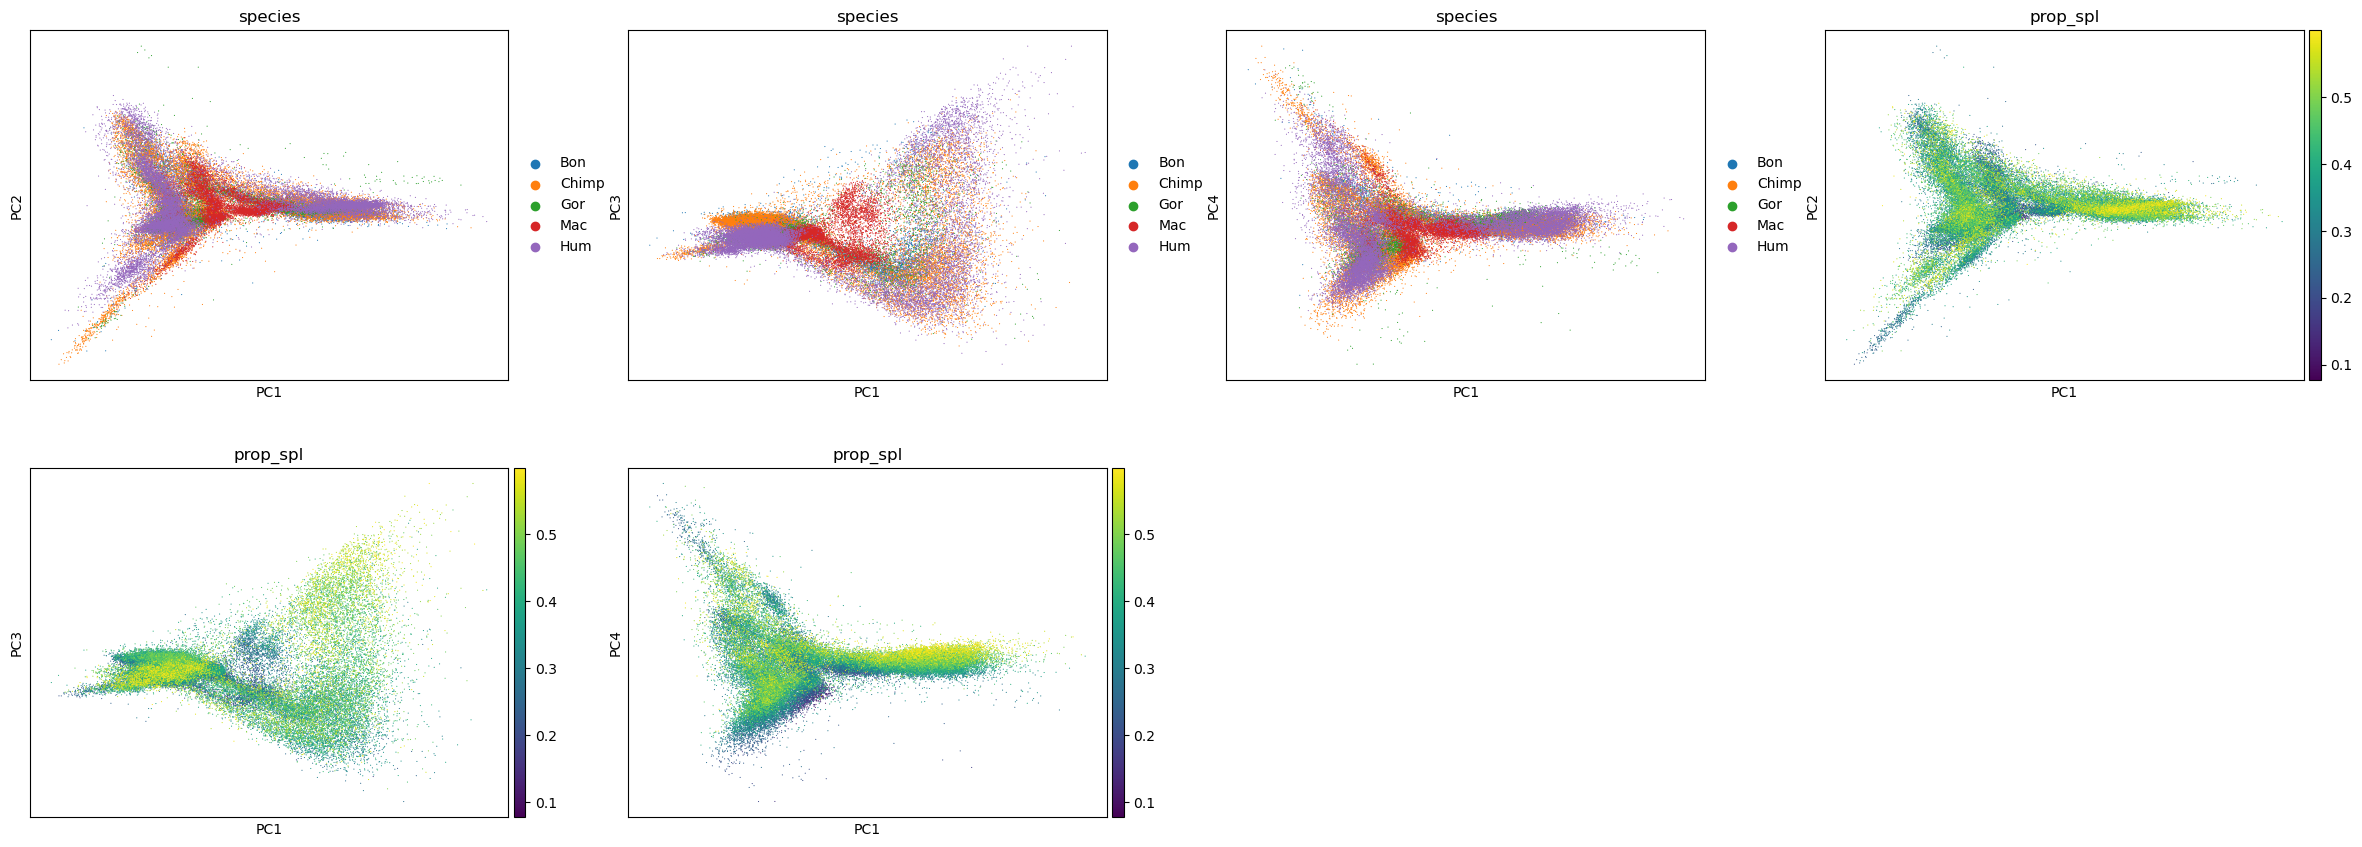

In [6]:
sc.pl.pca(merged, color=['species','prop_spl'], components=['1,2','1,3','1,4'])

In [42]:
bbknn.bbknn(merged, batch_key='species', n_pcs=30, neighbors_within_batch=3) # batches are here different species

computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:05)


In [43]:
sc.tools.umap(merged, random_state=54321)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:34)


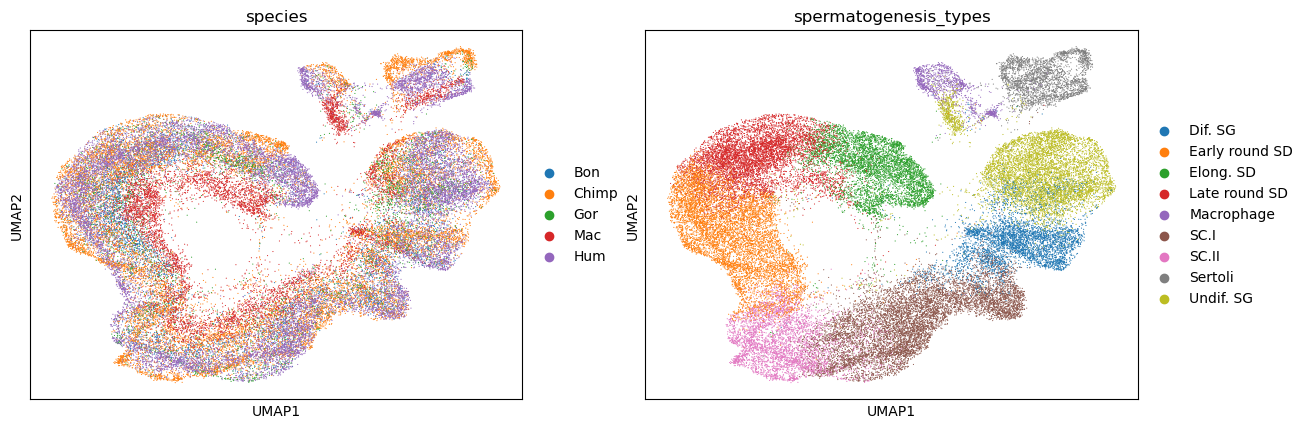

In [44]:
sc.plotting.umap(merged, color=['species','spermatogenesis_types'])

The different cell types are clustered together across all species

In [3]:
merged = sc.read('/home/astridkd/testis_singlecell/Workspaces/adahl/birc-project-akd/results/cluster_results/merged_adata.h5ad')

In [4]:
merged

AnnData object with n_obs × n_vars = 46782 × 20350
    obs: 'DATASET', 'batch', 'total_counts', 'n_genes_by_counts', 'percent_mito', 'prop_unspl', 'prop_spl', 'perc_MALAT1', 'n_genes', 'doublet_scores', 'predicted_doublets', 'SpermatogoniaA_score', 'SpermatogoniaB_score', 'SpermatocytesI_score', 'SpermatocytesII_score', 'Round.Spt_score', 'Elong.Spt_score', 'Sertoli_score', 'Macroph_score', 'Leydig_score', 'Endothelial_score', 'Undif. SG_score', 'Dif. SG_score', 'Lept. SC_score', 'Zyg. SC_score', 'Pach.Dipl. SC_score', 'Early round SD_score', 'Late round SD_score', 'Elong SD_score', 'SC_score', 'SC.I_score', 'SC.II_score', 'leiden_R.3', 'leiden_R.2', 'leiden_R.1', 'spermatogenesis_types', 'leiden_R.4', 'leiden_R.5', 'species'
    var: 'feature_types', 'chromosome', 'gene_ids-Bon', 'n_cells-Bon', 'highly_variable-Bon', 'means-Bon', 'dispersions-Bon', 'dispersions_norm-Bon', 'gene_ids-Chimp', 'n_cells-Chimp', 'highly_variable-Chimp', 'means-Chimp', 'dispersions-Chimp', 'dispersions_norm-

In [15]:
category_order=['Undif. SG','Dif. SG','SC.I','SC.II','Early round SD','Late round SD','Elong. SD','Sertoli']

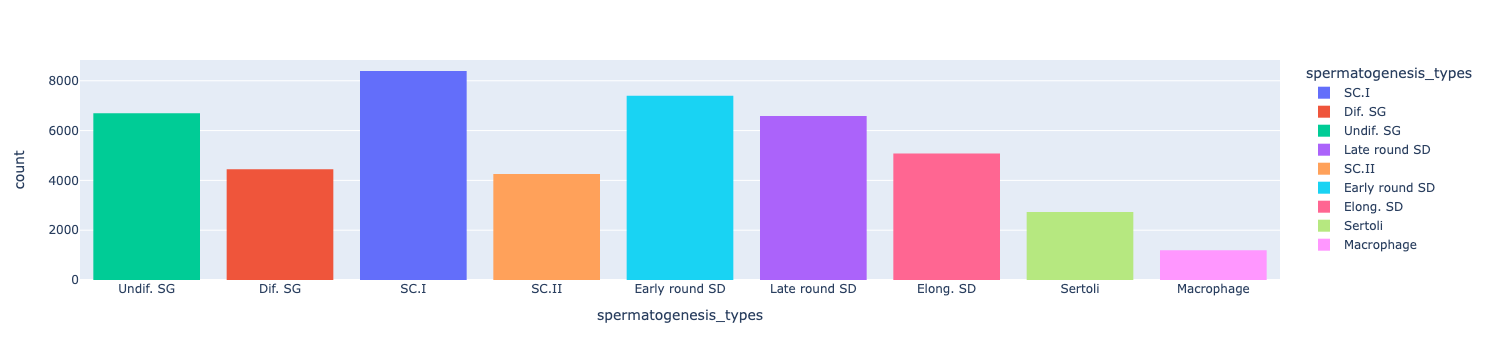

In [21]:
fig = px.histogram(merged.obs['spermatogenesis_types'], x='spermatogenesis_types', color='spermatogenesis_types')
fig.update_layout(
    xaxis=dict(
        categoryorder='array',
        categoryarray=category_order
    )
)
fig.show()

In [24]:
merged

AnnData object with n_obs × n_vars = 46782 × 20350
    obs: 'DATASET', 'batch', 'total_counts', 'n_genes_by_counts', 'percent_mito', 'prop_unspl', 'prop_spl', 'perc_MALAT1', 'n_genes', 'doublet_scores', 'predicted_doublets', 'SpermatogoniaA_score', 'SpermatogoniaB_score', 'SpermatocytesI_score', 'SpermatocytesII_score', 'Round.Spt_score', 'Elong.Spt_score', 'Sertoli_score', 'Macroph_score', 'Leydig_score', 'Endothelial_score', 'Undif. SG_score', 'Dif. SG_score', 'Lept. SC_score', 'Zyg. SC_score', 'Pach.Dipl. SC_score', 'Early round SD_score', 'Late round SD_score', 'Elong SD_score', 'SC_score', 'SC.I_score', 'SC.II_score', 'leiden_R.3', 'leiden_R.2', 'leiden_R.1', 'spermatogenesis_types', 'leiden_R.4', 'leiden_R.5', 'species'
    var: 'feature_types', 'chromosome', 'gene_ids-Bon', 'n_cells-Bon', 'highly_variable-Bon', 'means-Bon', 'dispersions-Bon', 'dispersions_norm-Bon', 'gene_ids-Chimp', 'n_cells-Chimp', 'highly_variable-Chimp', 'means-Chimp', 'dispersions-Chimp', 'dispersions_norm-

In [3]:
merged = sc.read('/home/astridkd/testis_singlecell/Workspaces/adahl/birc-project-akd/results/cluster_results/merged_adata.h5ad')

In [4]:
merged.varm['PCs']

array([[-0.00490014,  0.00222798,  0.0094523 , ...,  0.00098093,
        -0.00062993, -0.01047392],
       [ 0.00018853,  0.00396328, -0.00058165, ..., -0.00328474,
        -0.00318846, -0.00509633],
       [ 0.0104197 ,  0.00135208,  0.02208941, ...,  0.00101375,
        -0.00345933,  0.01222773],
       ...,
       [-0.02302387, -0.02881524, -0.00617803, ...,  0.01086854,
         0.01273043,  0.02094714],
       [-0.0090293 , -0.00555252, -0.00304284, ...,  0.01176071,
        -0.00013409,  0.00682721],
       [-0.0229443 , -0.03593431, -0.00540296, ..., -0.00091222,
         0.01614703,  0.01673634]])

In [6]:
merged.uns['pca']

{'params': {'use_highly_variable': False, 'zero_center': True},
 'variance': array([415.41154315, 277.39994013, 149.26367405, 147.94925526,
         83.86292399,  65.32295589,  56.42624869,  47.94085808,
         40.36721726,  36.49610595,  34.09652748,  28.89499758,
         27.7720777 ,  25.29548528,  22.91449955,  20.78506521,
         19.67033395,  18.00903685,  17.44720878,  16.8850389 ,
         16.68393201,  15.26727071,  14.26610888,  13.6584021 ,
         12.76634602,  12.44031989,  12.29670807,  11.59090382,
         11.06257257,  10.72505507,  10.53760583,  10.0013024 ,
          9.4626113 ,   9.34400431,   9.14095533,   8.60597271,
          8.28938119,   8.02224702,   7.73699809,   7.45536213,
          7.23914029,   7.08133819,   7.05703383,   6.82129828,
          6.75006654,   6.62969299,   6.50594428,   6.35054883,
          6.26378869,   6.21333643]),
 'variance_ratio': array([0.01947601, 0.01300552, 0.00699803, 0.0069364 , 0.0039318 ,
        0.00306258, 0.00264547, 

In [1]:
%run /home/astridkd/testis_singlecell/Workspaces/adahl/birc-project-akd/tutorial/Scripts/pythonScripts.py

In [2]:
# markers in article and course mixed
markers = dict() #make an empty dictionary
#markers['SpermatogoniaB'] = ['MKI67','DMRT1','STRA8'] 
### SPERMATOCYTOGENESIS
markers['Undif. SG'] = ['ID4','HMGA1'] # course
markers['Dif. SG'] = ['MKI67','DMRT1','STRA8'] # course
markers['SC.I'] = ['MEIOB','PRSS50','SYCP1','TEX101'] # course
markers['SC.II'] = ['PIWIL1','ACRV1','SPATA16','CLGN'] # course
### SPERMIOGENESIS
markers['Early round SD'] = ['LRRIQ1'] #Round spermatids, Distinct #better than tutorial
markers['Late round SD'] = ['ACRV1','SPACA1'] #Round spermatids, Distinct #better than tutorial
markers['Elong SD'] = ['SPATA3','NRBP1','PRM1','GABBR2'] #Elongated spermatids #better than tutorial
### SOMATIC CELLS
markers['Sertoli'] = ['CLU'] # very distinct #better than tutorial
markers['Macroph'] = ['APOE','CD74']
markers['Leydig'] = ['STAR','CYP11A1']
markers['Endothelial'] = ['CD34'] #'TM4SF1' not expressed

In [7]:
markers_scores, merged = marker_score(markers, merged)

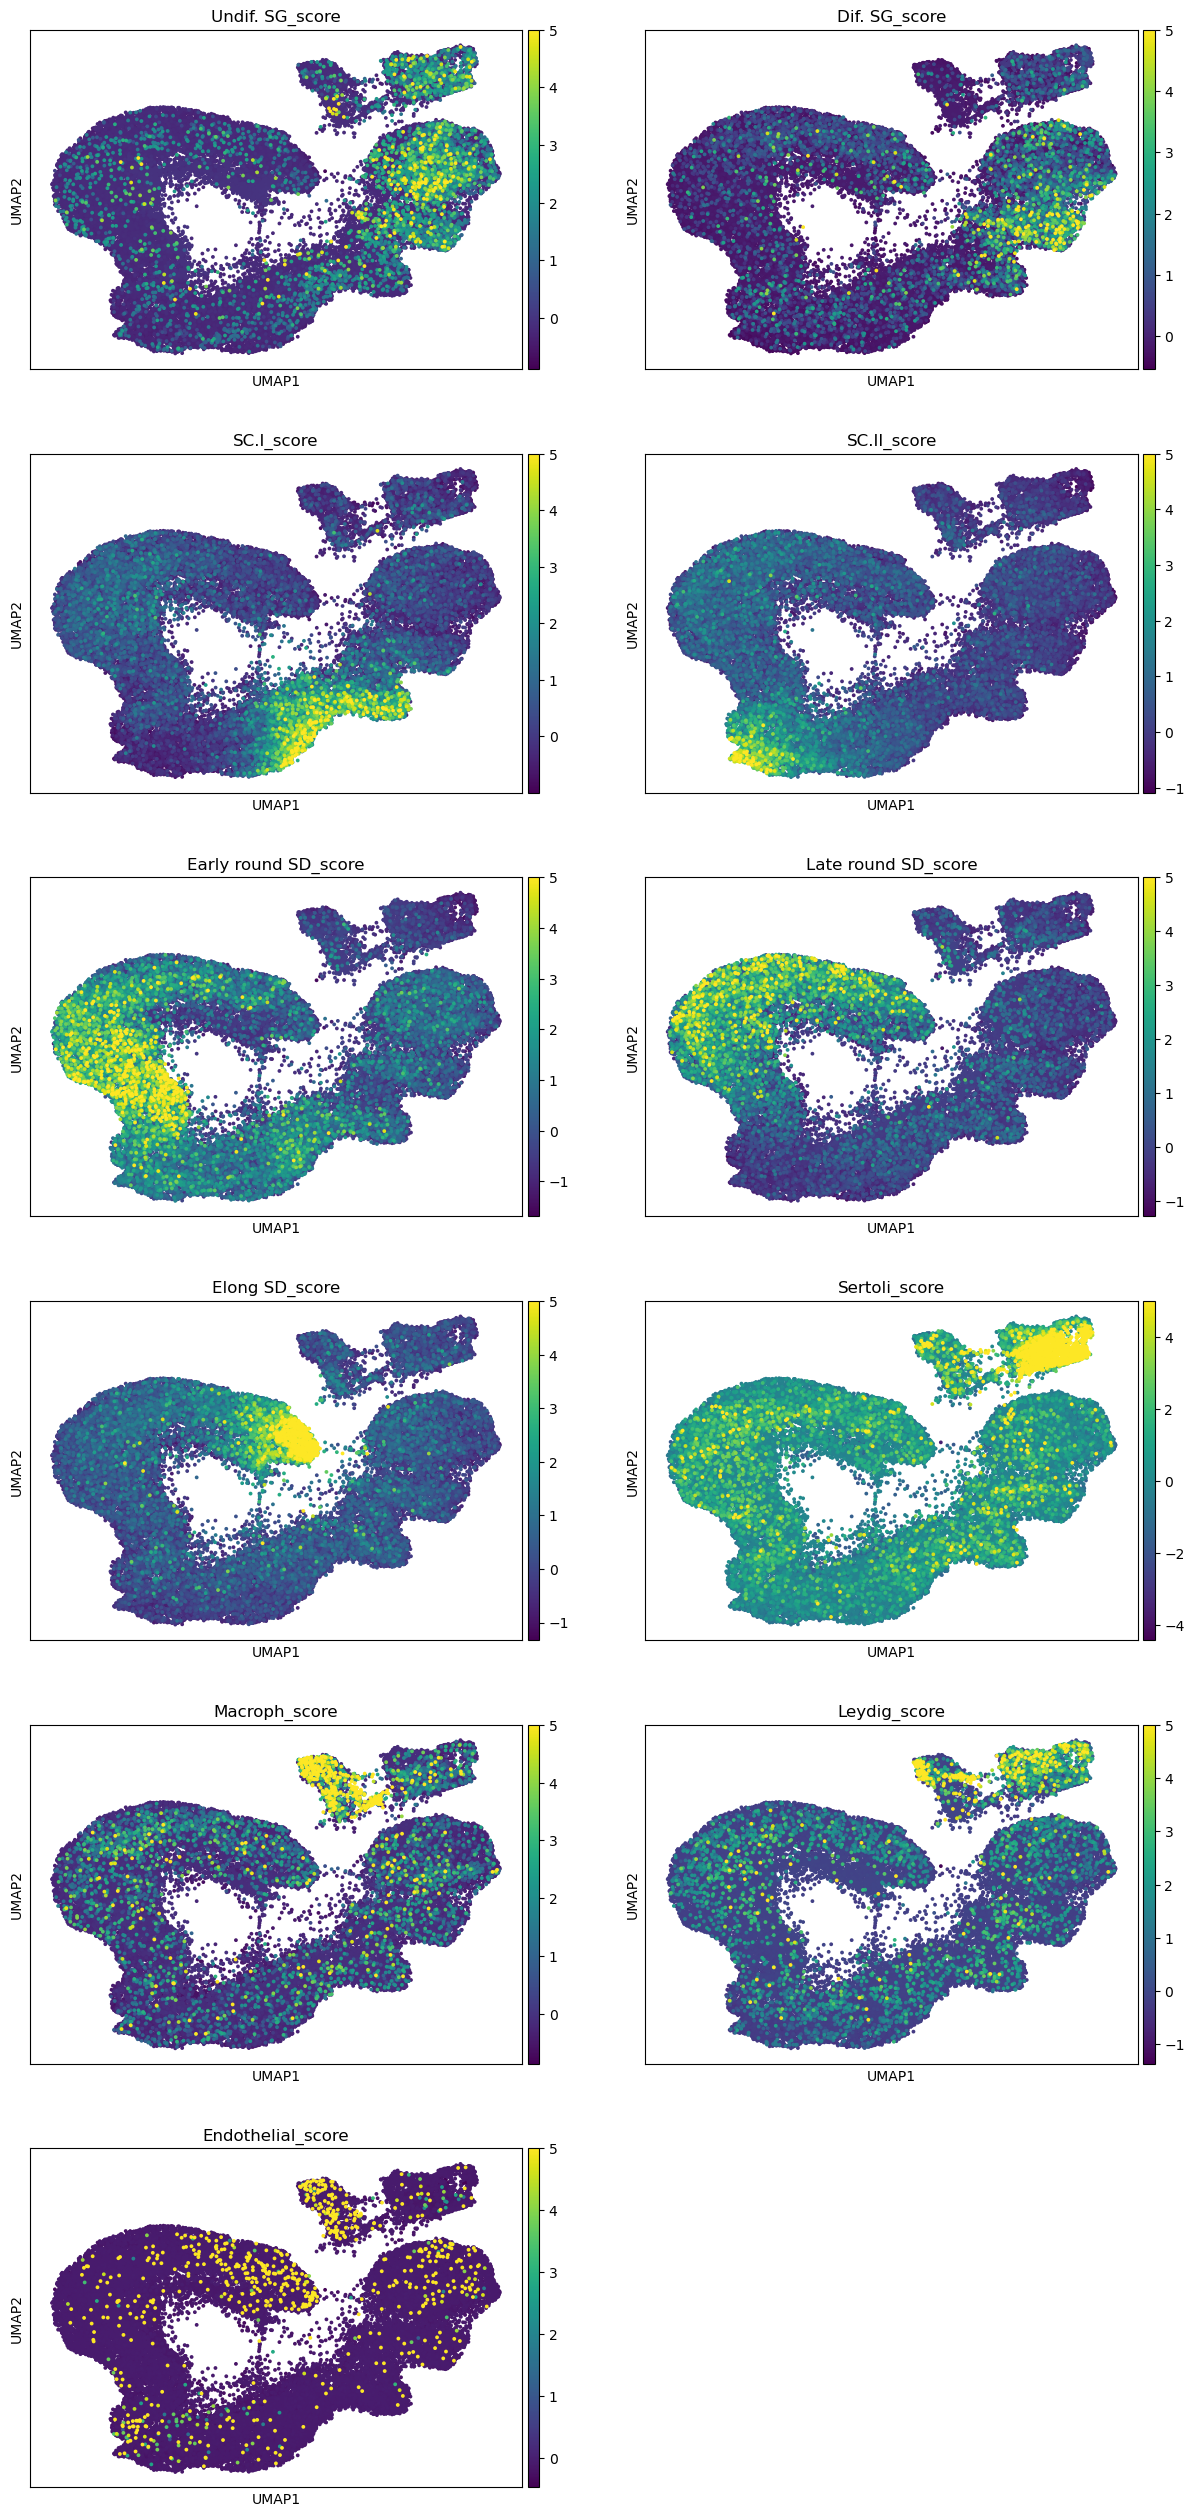

In [9]:
sc.plotting.umap(merged, color=markers_scores, components=['1,2'], ncols=2, vmax=5, s=30)

In [25]:
adata_out = '/home/astridkd/testis_singlecell/Workspaces/adahl/birc-project-akd/results/cluster_results/merged_adata.h5ad'

In [26]:
merged.write(adata_out)